# Your First Machine Learning Project - Detecting Breast Cancer

Breast cancer is the most common causes of death for women world-wide. The Wisconsin Breast Cancer dataset is a publicly available dataset which has been used in many studies: (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

The key challenge is to identify whether a cancer is malignant or benign. Making accurate determinations can be the difference between life and death for patients. 
A number of parameters were extracted from images of tumors, which we will use to build a model to classify the tumors. These are the parameters that human physicians use to determine cancer 

Here is an example of analysis on this dataset:
[Breast Cancer Detection with Reduced Feature Set](https://www.hindawi.com/journals/cmmm/2015/265138/)

Here is the diagram of our plan:
<img src="images/cancer_diagram.png">

Our dataset has 30 features and contains 2 labels for each dataset. We will explore that in more detail below. 


## Steps in this project

1. Getting the needed libraries.
2. Getting the data
3. Getting the data into a usable form.
4. Exploring the data.
5. Preparing the data for training.
6. Preparing the training and testing sets
7. Training the model.
8. Testing the model.

## Practical 

### Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn
%matplotlib inline

## Breast Cancer data

In [2]:
from sklearn.datasets import load_breast_cancer #Loading the breast cancer from a standard repository
cancer = load_breast_cancer()

Now, let's look at the dataset:

In [3]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

That's not very human-readable, so let's transform it a little. Let's start by getting the name of the fields.

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
print(cancer['target']) #This shows the class of the cancer in code form.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [7]:
print(type(cancer['target'][0]))

<class 'numpy.int32'>


In [8]:
print(cancer['target_names'])

['malignant' 'benign']


In [9]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### DataFrame
Using a dataframe object can make manipulating this data easier.

In [10]:
df_cancer = pd.DataFrame(np.c_[cancer['data'],cancer['target']],columns = np.append(cancer['feature_names'], ['target']))

One issue to be aware of that TensorFlow does not allow spaces in Feature names, so we will fix that now.

In [11]:
for key in df_cancer.keys():
    newkey = key.replace(" ", "_")
    df_cancer.rename(index=str,columns={key:newkey},inplace=True)
print(df_cancer.keys())

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'target'],
      dtype='object')


In [12]:
df_cancer.head()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean_fractal_dimension  ...  worst_texture  worst_perimeter  worst_area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst_smoothness  worst_compactness  worst_concavity  worst_concave_points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst_symmetry  worst_fractal_dimension  target  
0          0.4601                  0.11890     0.0  
1          0.2750                  0.08902     0.0  
2          0.3613                  0.08758     0.0  
3          0.6638                  0.17300     0.0  
4          0.2364                  0.07678     0.0  

[5 rows x 31 columns]

In [13]:
df_cancer.tail()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean_fractal_dimension  ...  worst_texture  worst_perimeter  worst_area  \
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst_smoothness  worst_compactness  worst_concavity  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst_concave_points  worst_symmetry  worst_fractal_dimension  target  
564                0.2216          0.2060                  0.07115     0.0  
565                0.1628          0.2572                  0.06637     0.0  
566                0.1418          0.2218                  0.07820     0.0  
567                0.2650          0.4087                  0.12400     0.0  
568                0.0000          0.2871                  0.07039     1.0  

[5 rows x 31 columns]

# Visualization of the Data

Let's look at the relationships between some of the variables, to get some idea of what models might be best for this system.

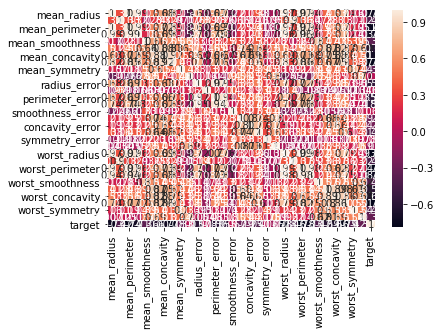

In [14]:
sns.heatmap(df_cancer.corr(), annot=True)

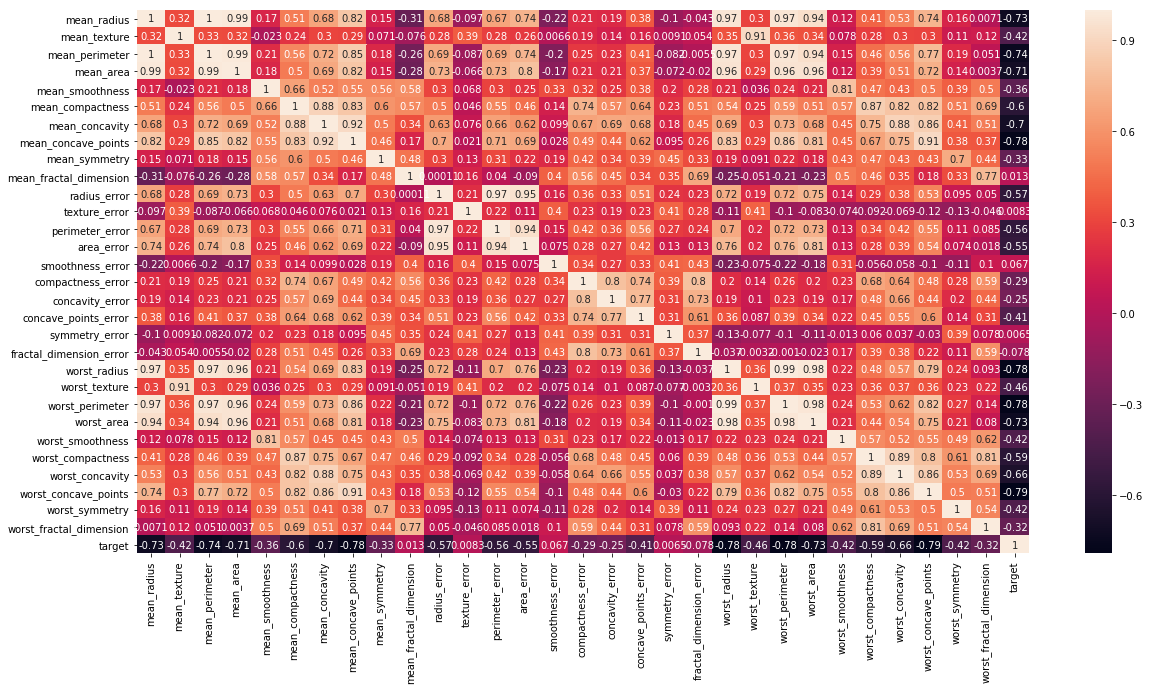

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(df_cancer.corr(),annot=True)

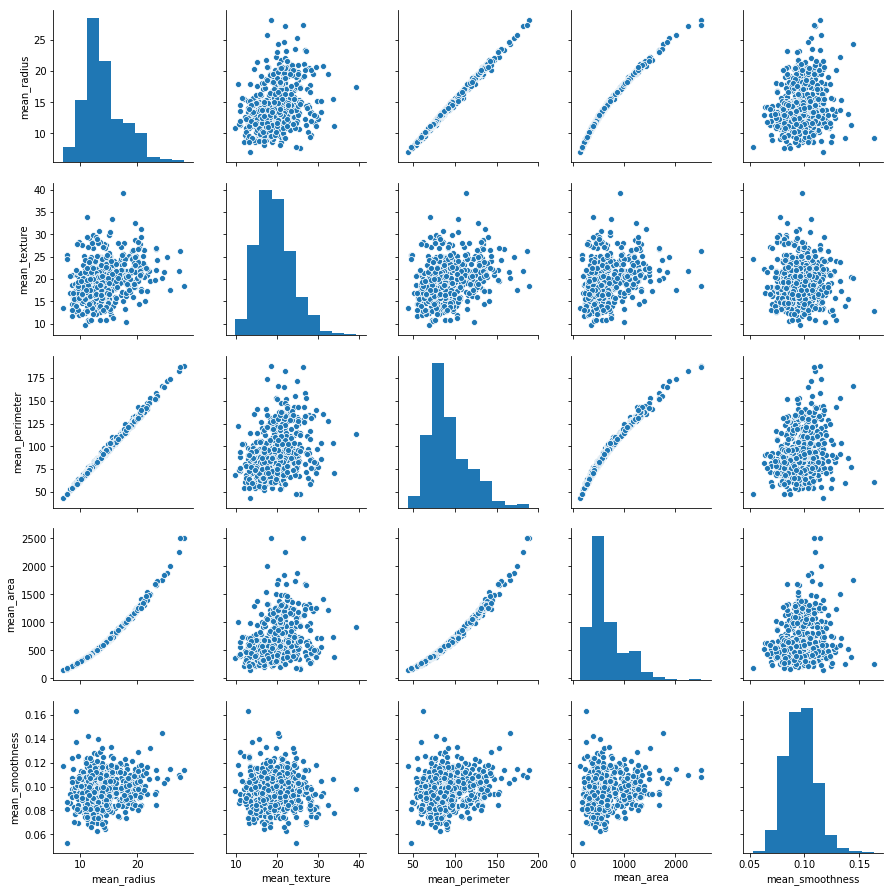

In [16]:
sns.pairplot(df_cancer,vars = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness'])

That doesn't tell us which cases are malignant vs benign, so we will add that information. The 'hue' keyword does that. 

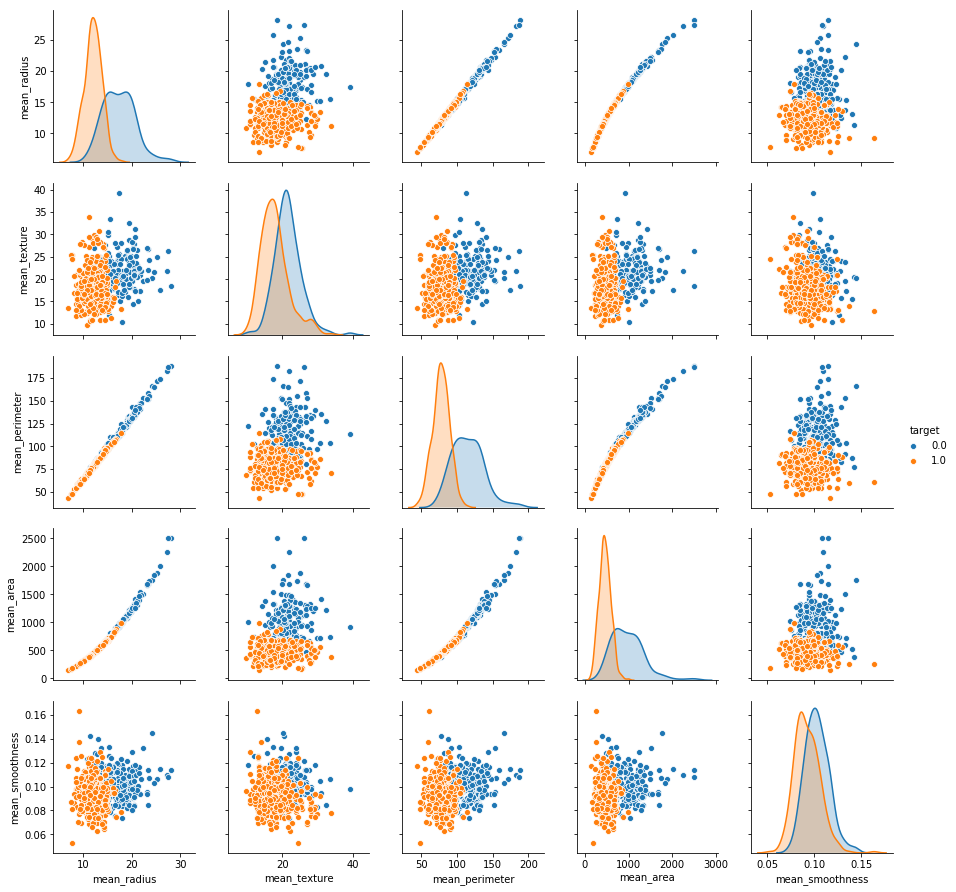

In [17]:
sns.pairplot(df_cancer,hue = 'target', vars = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness'])

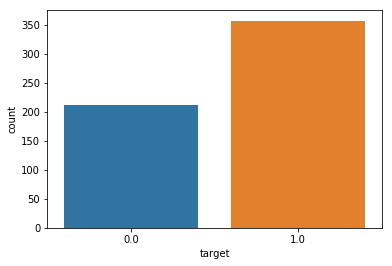

In [18]:
sns.countplot(df_cancer['target']) 

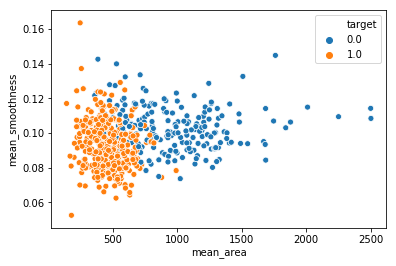

In [19]:
sns.scatterplot(x= 'mean_area', y='mean_smoothness', hue='target',data=df_cancer)

*With this information in hand, we should now be able to develop a model which we can use to make predictions.* With that in mind, I am defining my feature set to use the mean parameters.

In [20]:
features = ['mean_radius','mean_texture','mean_perimeter', 'mean_compactness', 'mean_concavity', 'mean_symmetry', 'mean_fractal_dimension' ]
labels = ['target']

# Model Training

We are going to process the data into a form for the model we will be using. 

## Creating Training and Test sets

In [21]:
randomized_data = df_cancer.reindex(np.random.permutation(df_cancer.index))

In [22]:
randomized_data.head()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
64         12.68         23.84           82.69      499.0          0.11220   
213        17.42         25.56          114.50      948.0          0.10060   
99         14.42         19.77           94.48      642.5          0.09752   
435        13.98         19.62           91.12      599.5          0.10600   
129        19.79         25.12          130.40     1192.0          0.10150   

     mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
64             0.1262         0.11280              0.06873         0.1905   
213            0.1146         0.16820              0.06597         0.1308   
99             0.1141         0.09388              0.05839         0.1879   
435            0.1133         0.11260              0.06463         0.1669   
129            0.1589         0.25450              0.11490         0.2202   

     mean_fractal_dimension  ...  worst_texture  worst_perimeter  worst_area  \
64                  0.06590  ...          33.47            111.8       888.3   
213                 0.05866  ...          28.07            120.4      1021.0   
99                  0.06390  ...          30.86            109.5       826.4   
435                 0.06544  ...          30.80            113.9       869.3   
129                 0.06113  ...          33.58            148.7      1589.0   

     worst_smoothness  worst_compactness  worst_concavity  \
64             0.1851             0.4061           0.4024   
213            0.1243             0.1793           0.2803   
99             0.1431             0.3026           0.3194   
435            0.1613             0.3568           0.4069   
129            0.1275             0.3861           0.5673   

     worst_concave_points  worst_symmetry  worst_fractal_dimension  target  
64                 0.1716          0.3383                  0.10310     0.0  
213                0.1099          0.1603                  0.06818     0.0  
99                 0.1565          0.2718                  0.09353     0.0  
435                0.1827          0.3179                  0.10550     0.0  
129                0.1732          0.3305                  0.08465     0.0  

[5 rows x 31 columns]

In [23]:
total_records = len(randomized_data)
training_set_size_portion = 0.8
training_set_size = int(total_records*training_set_size_portion)
test_set_size = total_records - training_set_size
print(total_records,training_set_size,test_set_size)

569 455 114


In [24]:
# Build the testing features and labels
testing_features = randomized_data.tail(test_set_size)[features].copy()
testing_labels = randomized_data.tail(test_set_size)[labels].copy()

In [25]:
testing_features.head()

mean_radius  mean_texture  mean_perimeter  mean_compactness  \
95         20.26         23.03          132.40           0.13130   
166        10.80          9.71           68.77           0.05736   
266        10.60         18.95           69.28           0.11470   
262        17.29         22.13          114.40           0.12730   
172        15.46         11.89          102.50           0.15550   

     mean_concavity  mean_symmetry  mean_fractal_dimension  
95          0.14650         0.2095                 0.05649  
166         0.02531         0.1381                 0.06400  
266         0.06387         0.1922                 0.06491  
262         0.09697         0.2108                 0.05464  
172         0.20320         0.1966                 0.07069

In [26]:
testing_labels.head()

target
95      0.0
166     1.0
266     1.0
262     0.0
172     0.0

In [27]:
print(testing_labels['target'][0], type(testing_labels['target'][0]))

0.0 <class 'numpy.float64'>


In [28]:
# Build the training features and labels
training_features = randomized_data.head(training_set_size)[features].copy()
training_labels = randomized_data.head(training_set_size)[labels].copy()
print(training_features.head())
print(training_labels.head())

     mean_radius  mean_texture  mean_perimeter  mean_compactness  \
64         12.68         23.84           82.69            0.1262   
213        17.42         25.56          114.50            0.1146   
99         14.42         19.77           94.48            0.1141   
435        13.98         19.62           91.12            0.1133   
129        19.79         25.12          130.40            0.1589   

     mean_concavity  mean_symmetry  mean_fractal_dimension  
64          0.11280         0.1905                 0.06590  
213         0.16820         0.1308                 0.05866  
99          0.09388         0.1879                 0.06390  
435         0.11260         0.1669                 0.06544  
129         0.25450         0.2202                 0.06113  
     target
64      0.0
213     0.0
99      0.0
435     0.0
129     0.0


## Create TensorFlow Feature Columns

In [29]:
feature_columns = [tf.feature_column.numeric_column(key) for key in features]

In [30]:
print(feature_columns)

[_NumericColumn(key='mean_radius', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='mean_texture', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='mean_perimeter', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='mean_compactness', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='mean_concavity', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='mean_symmetry', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='mean_fractal_dimension', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


# Choice of Model

There are many models that can be used to attempt to solve the problem of classifying wheter the cancer is benign or malignant. In this example, we will use a neural network; which is a mathematical model that is inspired by how brains use. 

The strength of neural networks has been shown in the ability of these algorithms to excel in certain problems, such as pattern recognition. In the case of this problem, there is a deep pattern that is inside the set of data and the cancer outcome (otherwise, how would the physician's determination be better than a random determination). 

#  Neural Networks

Neural networks are a type of machine learning algorithm that are inspired by neurons in the human brain. However, we can describe the action of the neural network as a function; that is, a relationship that maps a desired input to a desired output. 

Let us look at a *perceptron*; that is, a *single layer neural network*. 

<img src='images/perceptron.png'>

The *perceptron* is a mathematical function that takes a set of inputs, performs some operation, and outputs the result. In this case,
$$ y = \sum_{i} w_{i}x{i},$$
where $w_i$ is the weight of the perceptron. A neural netowrk is then a set of mathematical functions that map a given input to a desired output.

## Architecture of neural networks

A neural network consists of 
* An input layer
* Any number of hidden layers
* An output layer
* A set of weights and bias between each layer $\{w_i\}, \{b_i\}$
* An activation function for each layer, $\sigma$


<img src='images/neural_network_1.png'>

## Training Process

Each iteration of the training process consists of the following steps:
1. Calculating the predicted output $\hat{y}$, known as _*Feedforward*_
2. Updating the weights and biases, known as _*Backpropagation*_

Schematicially, this can be illustated as 
<img src='images/nn_iteration.png'>

### Feedforward

The forward motion is quite simply the calculation of the function in series.

The loss function comes into play at this point, since we must determine the "goodness" of our performance.
There are many possibilities to use for the *loss* function, such as the familar *sum-of-squares error*
$$ \mathrm{loss} = \sum_{i=1}^n (y-\hat{y})^2$$

### Backprogagation 

As we measure the error of our prediction, we can now find a way to use the error to improve the network, if desired. This is termed *backpropagation*. 
we may search the error function in order to update the weights and bias.
One method may be to use the derviative of the loss function to determine the path of greatest decrease as in *gradient descent*.

## Hyperparameters

*Hyperparameters* are the *variables which determine the network structure* and *how the network is trained*. Examples that effect the *learning rate* are *epoch*, *batches*, and *iterations*.

An *epoch* is when an entire training dataset is passed forward and backward through the network *once*. It is at the end of an epoch that parameters (weights and biases) have updated. 

An *iteration* is the number of *batches* needed to complete one epoch.

In some cases, the dataset will need to be divided into *batches* in order to fit everything in memory in order complete the calculations. For example, you may have 1000 training examples, but you need to load and calculate on 100 samples at a time, so it will take 10 iterations to complete one epoch. 


## Define the Neural Network used to classify the data

With the data in hand, we will now create the neural network which will be trained on this data.

Since we are using a DNN, we will have to specify 
* The features
* The structure of the network, which will be a [10,20,10] --- 10 neturons -> 20 neurons -> 10 neuron in the "hidden units"
* The number of classes that are possible for our classification, which is 2 in this case (0-maligenet 1-beign)
* A work directory

The object that will be used is 
'tf.estimator.DNNClassifer'
Documentation of this object is at 
<https://www.tensorflow.org/api_docs/python/tf/estimator/DNNClassifier>


In [31]:
classifier = tf.estimator.DNNClassifier(feature_columns=feature_columns,hidden_units=[10,20,10], n_classes=2,model_dir='tmp/model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'tmp/model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001DA02EF4CC0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


# Train the network

We define the training the input function now. 

The function that does this is 

`train_input_fn = tf.estimator.inputs.pandas_input_fn(x=training_features, y=training_labels['target'], num_epochs=15,shuffle=True)`

In this case, we will pass through the data set 15 times, updating the weight and biases based on the loss.
<https://www.tensorflow.org/api_docs/python/tf/estimator/inputs/pandas_input_fn> for complete documentation of the function.

In [32]:
train_input_fn = tf.estimator.inputs.pandas_input_fn(x=training_features, y=training_labels['target'], num_epochs=15,shuffle=True)

In [33]:
print(type(training_features['mean_radius']), type(training_labels['target']))

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [38]:
# Train the model using the classifer
classifier.train(input_fn=train_input_fn,steps=1000)
#

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tmp/model\model.ckpt-626
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 626 into tmp/model\model.ckpt.
INFO:tensorflow:loss = 43.76497, step = 627
INFO:tensorflow:Saving checkpoints for 680 into tmp/model\model.ckpt.
INFO:tensorflow:Loss for final step: 11.906411.


## Testing the Model

In [39]:
test_input_fn = tf.estimator.inputs.pandas_input_fn(x=testing_features,y=testing_labels['target'],num_epochs=15,shuffle=False)

In [36]:
classifier.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-12-10:11:02
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tmp/model\model.ckpt-626
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-12-10:11:03
INFO:tensorflow:Saving dict for global step 626: accuracy = 0.84210527, accuracy_baseline = 0.5964912, auc = 0.9414962, auc_precision_recall = 0.9590864, average_loss = 0.34508887, global_step = 626, label/mean = 0.5964912, loss = 42.150143, precision = 0.8472222, prediction/mean = 0.57258713, recall = 0.89705884
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 626: tmp/model\model.ckpt-626


{'accuracy': 0.84210527,
 'accuracy_baseline': 0.5964912,
 'auc': 0.9414962,
 'auc_precision_recall': 0.9590864,
 'average_loss': 0.34508887,
 'label/mean': 0.5964912,
 'loss': 42.150143,
 'precision': 0.8472222,
 'prediction/mean': 0.57258713,
 'recall': 0.89705884,
 'global_step': 626}

In [40]:
accuracy_score = classifier.evaluate(input_fn=test_input_fn)["accuracy"]
print("Accuracy = {}".format(accuracy_score))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-12-10:24:59
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tmp/model\model.ckpt-680
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-12-10:25:00
INFO:tensorflow:Saving dict for global step 680: accuracy = 0.8684211, accuracy_baseline = 0.5964912, auc = 0.9464514, auc_precision_recall = 0.96257144, average_loss = 0.33648017, global_step = 680, label/mean = 0.5964912, loss = 41.09865, precision = 0.84415585, prediction/mean = 0.62728983, recall = 0.9558824
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 680: tmp/model\model.ckpt-680
Accuracy = 0.8684210777282715
